In [2]:
from tensorflow import keras

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
model = Sequential()

In [5]:
model.add(Dense( units = 64 , activation = 'relu' , input_dim = 30))
model.add(Dense( units = 32 , activation = 'relu'))
model.add(Dense( units = 16 , activation = 'relu'))
model.add(Dense( units = 1 , activation = 'sigmoid'))

In [6]:
model.compile(optimizer= 'adam' , loss = 'binary_crossentropy' , metrics= ['accuracy'])

In [7]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [12]:
print(x_train.shape)
print(y_train.shape)

(455, 30)
(455,)


In [9]:
model.fit(x_train , y_train , epochs = 30 , batch_size = 50 , validation_data= (x_test , y_test))

Epoch 1/30
10/10 [==============================] - 0s 7ms/step - loss: 0.0383 - accuracy: 0.9912 - val_loss: 0.0791 - val_accuracy: 0.9386
Epoch 2/30
10/10 [==============================] - 0s 4ms/step - loss: 0.0365 - accuracy: 0.9912 - val_loss: 0.0783 - val_accuracy: 0.9474
Epoch 3/30
10/10 [==============================] - 0s 4ms/step - loss: 0.0345 - accuracy: 0.9912 - val_loss: 0.0761 - val_accuracy: 0.9386
Epoch 4/30
10/10 [==============================] - 0s 4ms/step - loss: 0.0337 - accuracy: 0.9912 - val_loss: 0.0736 - val_accuracy: 0.9474
Epoch 5/30
10/10 [==============================] - 0s 5ms/step - loss: 0.0317 - accuracy: 0.9912 - val_loss: 0.0728 - val_accuracy: 0.9474
Epoch 6/30
10/10 [==============================] - 0s 4ms/step - loss: 0.0299 - accuracy: 0.9912 - val_loss: 0.0719 - val_accuracy: 0.9474
Epoch 7/30
10/10 [==============================] - 0s 4ms/step - loss: 0.0284 - accuracy: 0.9912 - val_loss: 0.0707 - val_accuracy: 0.9474
Epoch 8/30
10/10 [==

In [10]:
score = model.evaluate(x_test, y_test)
score

4/4 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9649


[0.06261544674634933, 0.9649122953414917]

In [18]:
predictions = model.predict(x_test)
predictions[:10]

array([[1.5709297e-06],
       [8.7338495e-01],
       [9.9995941e-01],
       [9.9712348e-01],
       [9.9993008e-01],
       [9.9998283e-01],
       [9.9999964e-01],
       [9.9998724e-01],
       [9.9999964e-01],
       [1.0000000e+00]], dtype=float32)

In [20]:
predictions.shape

(114, 1)

In [12]:
import pandas as pd

In [21]:
# #predictions = predictions.reshape(-1,1)
# ans = pd.Series(predictions)
# ans

In [22]:
sol = []
def encoding(x):
    n = len(x)
    for i in range(n):
        if x[i] > 0.5 :
            sol.append(1)
        else:
            sol.append(0)

In [24]:
encoding(predictions)

In [26]:
sol[:5]

[0, 1, 1, 1, 1]

In [31]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [30]:
confusion_matrix(y_test , sol)

array([[47,  0],
       [ 4, 63]], dtype=int64)

In [32]:
accuracy_score(y_test , sol)

0.9649122807017544

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Predicted')

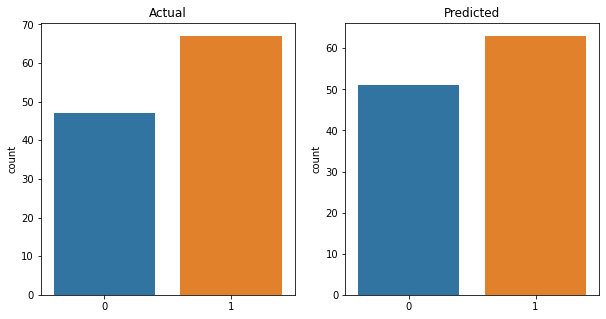

In [49]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(y_test)
plt.title('Actual')
plt.subplot(1,2,2)
sns.countplot(sol)
plt.title('Predicted')